In [156]:
from doctest import testfile

import numpy as np
import matplotlib.pyplot as plt

In [233]:
#Variables
#BitsArray = [700,700,700, 700, 700, 700, 700]
bits_tx = np.random.randint(0,2, size=700)
SF = 7
SF_Validos = [7, 8, 9, 10, 11, 12]
M = 2**SF    # cantidad de muestras por chirp
simbolo_tx = coder(bits_tx, SF)
Decodificados = decoder(simbolo_tx, SF)
chirp_tx = waveform_former(simbolo_tx, SF)
chirp_tx_aux = waveform_former(simbolo_tx, SF)[0]
downchirp = (1 / np.sqrt(M)) * np.exp(-1j * 2 * np.pi * np.arange(M)**2 / M)
simbolo_rx = n_tuple_former(chirp_tx, SF)
snr_db_range = np.arange(-11, -6, 1)

## CODIFICADOR

In [158]:

def coder(bits, SF):

    if SF not in SF_Validos:
        raise ValueError("Invalido")
    if len(bits) % SF != 0:
        raise ValueError("Numero de bits no es multiplo de SF")

    N_simbolos = len(bits) // SF   #Division de enteros
    s = []

    for i in range(N_simbolos):
        for h in range(SF):
            s[i] += bits[i * SF + h] * (2 ** h)

    return s

print(simbolo_tx)

[ 90 113  14  42   5  88  39  60  71  87  85  99  98  41  66  94 113   4
  65  92  30  24  25   4  32 115 116  96 124 105  14 110 119 104 127  17
  94  27  46  43  74  88  81  49 106 112  30  76 103 103 119 115  39  10
  97  31 111 119   7  98  58  16  88 124  32  45  68  74  40 100  71   5
  89 110  21 104  99 106   3  45  18  78  34  18  31 113  86  46  25  62
  41  94  83  87  26 112  78  40  68  84]


###  Ejemplo de codificación usando la Ecuación (1)

#### Datos de entrada:

- bits = [1, 0, 0, 1, 1, 1, 0]
- SF = 7

#### Desarrollo paso a paso:

Agrupamos los 7 bits como un único símbolo, ya que SF = 7.

$\begin{aligned}
s &= w_0 \cdot 2^0 + w_1 \cdot 2^1 + w_2 \cdot 2^2 + w_3 \cdot 2^3 + w_4 \cdot 2^4 + w_5 \cdot 2^5 + w_6 \cdot 2^6 \\
  &= 1 \cdot 2^0 + 0 \cdot 2^1 + 0 \cdot 2^2 + 1 \cdot 2^3 + 1 \cdot 2^4 + 1 \cdot 2^5 + 0 \cdot 2^6 \\
  &= 1 \cdot 1 + 0 \cdot 2 + 0 \cdot 4 + 1 \cdot 8 + 1 \cdot 16 + 1 \cdot 32 + 0 \cdot 64 \\
  &= 1 + 0 + 0 + 8 + 16 + 32 + 0 \\
  &= 57
\end{aligned}$


####  Resultado esperado:
57


## DECODIFICADOR

In [159]:
def decoder(s, SF):
    if SF not in SF_Validos:
        raise ValueError("SF inválido")

    bits_recuperados = []

    for simbolo in s:
        for h in range(SF):
            bit = (simbolo >> h) & 1
            bits_recuperados.append(bit)

    return np.array(bits_recuperados, dtype=int)
print(Decodificados)

[0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0
 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0
 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0
 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1
 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0
 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1
 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0
 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1
 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1
 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0
 1 0 0 0 1 0 0 1 1 1 1 1 

### Decodificación manual del símbolo (Ecuación inversa de la codificación)

#### Dato recibido:

- Símbolo codificado: s = 57
- Spreading Factor: SF = 7

Queremos obtener los 7 bits originales que generaron este símbolo.


#### Desarrollo paso a paso:
$\begin{aligned}
c(nT_s + kT) = \frac{1}{\sqrt{2^{SF}}} \cdot e^{j2\pi \cdot \left[ \frac{(s(nT_s) + k) \bmod 2^{SF} \cdot k}{2^{SF}} \right]}
\quad \text{para } k = 0, 1, \dots, 2^{SF}-1
\end{aligned}$


$ (57 >> 0) \& 1 = 57 \& 1 \newline$
                    $\begin{aligned} (57 >> 1) \& 1 = 28 \& 1 \end{aligned}$
                    $\begin{aligned} (57 >> 2) \& 1 = 14 \& 1 \end{aligned}$
                    $\begin{aligned} (57 >> 3) \& 1 = 7 \& 1 \end{aligned}$
                    $\begin{aligned} (57 >> 4) \& 1 = 3 \& 1 \end{aligned}$
                    $\begin{aligned} (57 >> 5) \& 1 = 1 \& 1 \end{aligned}$
                    $\begin{aligned} (57 >> 6) \& 1 = 0 \& 1 \end{aligned}$



In [160]:
def ber(bits_tx,bits_rx):
    return  np.mean(bits_tx != bits_rx)

print(ber(bits_tx,Decodificados))

0.4828571428571429


### Waveformer Former

In [161]:

def waveform_former(s, SF):
    chirps = []

    for simbolo in s:
        k = np.arange(M)
        fase = ((simbolo + k) % M) * k / M
        chirp = (1 / np.sqrt(M)) * np.exp(1j * 2 * np.pi * fase)
        chirps.append(chirp)

    return np.array(chirps)

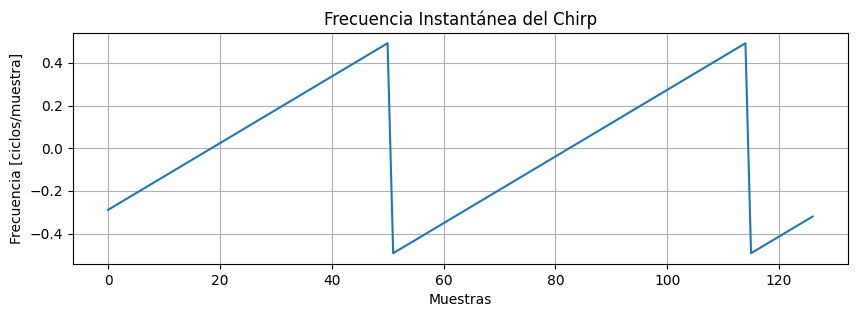

C:\Users\nik01\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\nik01\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


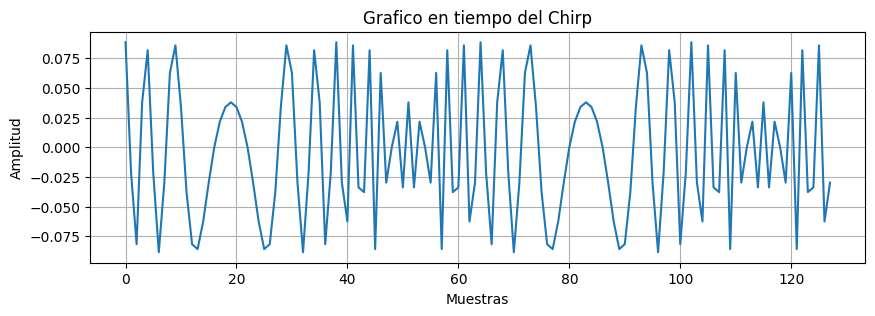

In [162]:
# Generar un chirp
# Calcular fase y frecuencia instantánea
fase = np.unwrap(np.angle(chirp_tx_aux))
frecuencia_inst = np.diff(fase) / (2 * np.pi)

# Graficar
plt.figure(figsize=(10, 3))
plt.plot(frecuencia_inst)
plt.title("Frecuencia Instantánea del Chirp")
plt.xlabel("Muestras")
plt.ylabel("Frecuencia [ciclos/muestra]")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(chirp_tx_aux[:2**SF])
plt.title("Grafico en tiempo del Chirp")
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

##  Waveform Former

###  Ecuación (2) del paper de Vangelista

La señal modulada transmitida para un símbolo $\begin{aligned}( s(nT_s) \in \{0, 1, \dots, 2^{SF} - 1\}) \end{aligned}$, según la Ecuación (2) del paper, se define como:



$\begin{aligned}
c(nT_s + kT) = \frac{1}{\sqrt{2^{SF}}} \cdot e^{j2\pi \cdot \left[ \frac{(s(nT_s) + k) \bmod 2^{SF} \cdot k}{2^{SF}} \right]}
\quad \text{para } k = 0, 1, \dots, 2^{SF}-1
\end{aligned}$

Donde:
- $\begin{aligned} SF \end{aligned}$: Spreading Factor.
- $\begin{aligned} s(nT_s)\end{aligned}$: símbolo entero codificado (de 0 a \(2^{SF}-1\)).
- $\begin{aligned} k \end{aligned}$: índice de muestra temporal (discreto).
- $\begin{aligned} c(nT_s + kT) \end{aligned}$: muestra compleja de la forma de onda LoRa transmitida.

Esta señal es un "chirp" modulado en frecuencia, cuya frecuencia instantánea varía linealmente.




### n-Tuple Former

In [163]:
def n_tuple_former(received_chirps, SF):
    M = 2 ** SF
    k = np.arange(M)
    downchirp =  np.exp(-1j * 2 * np.pi * k**2 / M)

    simbolos_estimados = []
    for chirp in received_chirps:
        producto = chirp * downchirp
        fft_producto = np.fft.fft(producto)
        simbolo_estimado = np.argmax(np.abs(fft_producto))
        simbolos_estimados.append(simbolo_estimado)

    return np.array(simbolos_estimados)


##  n-Tuple Former — Receptor Óptimo

###  Descripción Teórica (Sección III del paper de Vangelista)

La detección del símbolo transmitido se realiza aplicando un correlador discreto implementado como un receptor óptimo (n-Tuple Former). El procedimiento consiste en:

1. Multiplicar el chirp recibido por una señal conjugada de referencia conocida como "downchirp":
   $\begin{aligned}
   d(k) = e^{-j2\pi \cdot \frac{k^2}{2^{SF}}}
   \end{aligned}$
2. Aplicar una Transformada Rápida de Fourier (FFT) al producto.
3. Detectar el símbolo como el índice del valor máximo del espectro resultante.


###  Análisis Matemático

Para cada chirp recibido $\begin{aligned} r(k) \end{aligned}$, se realiza:

$\begin{aligned}
d(k) &= r(k) \cdot e^{-j2\pi \cdot \frac{k^2}{2^{SF}}} \\
R(f) &= \text{FFT}\left\{ d(k) \right\} \\
\hat{s} &= \arg \max_{f} \left| R(f) \right|
\end{aligned}$

Donde:
- $\begin{aligned} r(k) \end{aligned}$: chirp recibido de longitud $\begin{aligned} M = 2^{SF} \end{aligned}$
- $\begin{aligned} d(k) \end{aligned}$: señal desmodulada en base al downchirp
- $\begin{aligned} R(f) \end{aligned}$: transformada espectral
- $\begin{aligned} \hat{s} \end{aligned}$: símbolo estimado

Este proceso actúa como un **correlador en frecuencia**, donde cada símbolo posible produce un pico en una posición distinta del espectro. El símbolo transmitido es el que **mejor correlaciona** con el chirp recibido.



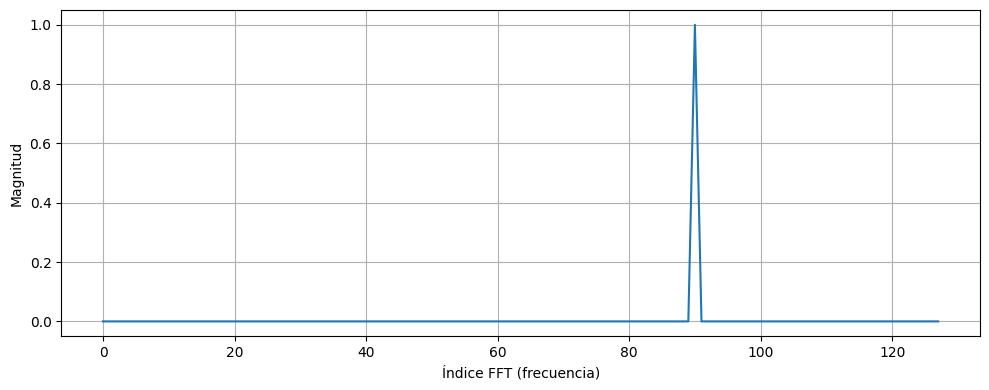

In [164]:
# Producto chirp con downchirp
produc = chirp_tx_aux * downchirp
fft_result = np.fft.fft(produc)
magnitud = np.abs(fft_result)

# Graficar la magnitud de la FFT
plt.figure(figsize=(10, 4))
plt.plot(magnitud)
plt.xlabel("Índice FFT (frecuencia)")
plt.ylabel("Magnitud")
plt.grid(True)
plt.tight_layout()
plt.show()

In [166]:
def ser(s_tx, s_rx):
    return np.mean(s_rx != s_tx)

In [165]:
# Transmisor

# Calcular SER
print("Símbolos transmitidos:", simbolo_tx)
print("Símbolos decodificados:", simbolo_rx)
print("SER:", ser(simbolo_tx, simbolo_rx))

Símbolos transmitidos: [ 90 113  14  42   5  88  39  60  71  87  85  99  98  41  66  94 113   4
  65  92  30  24  25   4  32 115 116  96 124 105  14 110 119 104 127  17
  94  27  46  43  74  88  81  49 106 112  30  76 103 103 119 115  39  10
  97  31 111 119   7  98  58  16  88 124  32  45  68  74  40 100  71   5
  89 110  21 104  99 106   3  45  18  78  34  18  31 113  86  46  25  62
  41  94  83  87  26 112  78  40  68  84]
Símbolos decodificados: [ 90 113  14  42   5  88  39  60  71  87  85  99  98  41  66  94 113   4
  65  92  30  24  25   4  32 115 116  96 124 105  14 110 119 104 127  17
  94  27  46  43  74  88  81  49 106 112  30  76 103 103 119 115  39  10
  97  31 111 119   7  98  58  16  88 124  32  45  68  74  40 100  71   5
  89 110  21 104  99 106   3  45  18  78  34  18  31 113  86  46  25  62
  41  94  83  87  26 112  78  40  68  84]
SER: 0.0


### Implementación del ruido AWGN

In [197]:
def agregacion_AWNG(chirp_tx, snr_db):
    snr_lineal = (10**(snr_db / 10.0))
    potencia_ruido_N0 = 1.0 / snr_lineal
    sigma = np.sqrt(potencia_ruido_N0 / 2.0)
    ruido_complejo = np.random.normal(0, sigma, size=chirp_tx.shape) +1j * np.random.normal(0, sigma, size=chirp_tx.shape)
    return chirp_tx + ruido_complejo

##  Canal con Ruido AWGN y Curva BER/SER

### AWGN (Additive White Gaussian Noise)
Según la Sección IV del paper, el sistema puede ser evaluado bajo un modelo de canal con ruido aditivo blanco gaussiano complejo (AWGN).
Es un modelo de canal donde el ruido se suma a la señal transmitida:
- Media: 0
- Varianza: $\begin{aligned} \sigma^2 = \frac{E_s}{2 \cdot \text{SNR}_{\text{linear}}}\end{aligned}$


Donde:

$\begin{aligned}
\text{SNR}_{\text{linear}} = 10^{\frac{\text{SNR}_{dB}}{10}}, \quad
\sigma^2 = \frac{E_s}{2 \cdot \text{SNR}_{\text{linear}}}
\end{aligned}$



### Procedimiento:
1. Se genera una señal chirp (modulada) por símbolo.
2. Se suma ruido Gaussiano complejo a la señal transmitida.
3. Se decodifica usando n-Tuple Former + FFT.
4. Se comparan los símbolos y bits originales con los decodificados.
5. Se calcula y grafica:
   - BER: tasa de error de bit.
   - SER: tasa de error de símbolo.

In [199]:
chirps_rx_con_ruido = agregacion_AWNG(chirp_tx, -10)  # Ejemplo con SNR = -10 dB
simbolos_rxx = n_tuple_former(chirps_rx_con_ruido, SF)
bits_rxx = decoder(simbolos_rxx, SF)

print("Símbolos transmitidos:", simbolo_tx)
print("Símbolos decodificados:", simbolos_rxx)

print(f"BER: {ber(bits_tx, bits_rxx)}")
print(f"SER: {ser(simbolo_tx, simbolos_rxx)}")







Símbolos transmitidos: [ 19  41  77  80  28  94  57  37  72 110   1  77 107 122  25  85  13  22
  42  34  75  33 102  16  83 119  25  38  66  68  36 111  31  64  18  61
  63  51  41  33  63  63  53  74  44  70  61  64  13  46  47  44  83  58
   7  94   6  54  40  53  87  87  10 126  28 107  27  51  36 115  37   5
  47  58  64  42 106  38 124  10  23  17  49   2  77 111  93  48  12   0
  48  34  14 127  98   8  14  63  69 113]
Símbolos decodificados: [106  76  29  75 119  54 113   5  25 108 115  58  12  53  39  69  64  95
  68  34  40 101   9  76  27  21  94  69  24  22  49  37  16  11  17  98
  27  31  36  53  34  39 101  69  68  48 103  61  13  44  30  43  41  94
  52   2  54  68  89  29  65  31 107  48  45  50   9  72  71   5  65  67
 124 105  49  62  23  78  24  89 126 115 102 100  70  93  18  36 101  83
  80 115 122 104  19  61   9  77 115 120]
BER: 0.49142857142857144
SER: 0.98


In [202]:
def canal_selectivo_frecuencia(chirps, SF):
    h = [np.sqrt(0.8), np.sqrt(0.2)]
    signal_con_canal = np.zeros_like(chirps, dtype=complex)

    for i in range(chirps.shape[0]):
        # Aplicar el canal a un solo chirp usando convolución
        chirp_individual = chirps[i]
        chirp_con_canal = np.convolve(chirp_individual, h, mode='full')
        signal_con_canal[i] = chirp_con_canal[:M]
    return signal_con_canal

## Canal Selectivo en Frecuencia


En la Sección IV del paper de Vangelista, se modela un canal selectivo en frecuencia mediante una respuesta al impulso discreta definida como:

$\begin{aligned}
h(nT) = \sqrt{0.8} \cdot \delta(nT) + \sqrt{0.2} \cdot \delta(nT - T)
\end{aligned}$

Este canal tiene dos trayectorias:

- Una trayectoria directa con ganancia $\begin{aligned} \sqrt{0.8} \end{aligned}$ y sin retardo.
- Una trayectoria secundaria con ganancia $\begin{aligned} \sqrt{0.2} \end{aligned}$ y un retardo de $\begin{aligned} T \end{aligned}$, es decir, de una duración completa de chirp.

Dado que cada chirp tiene $\begin{aligned} M = 2^{\text{SF}} \end{aligned}$ muestras, se implementa el canal como una convolución discreta entre la señal transmitida y un vector $\begin{aligned} h \end{aligned}$ con dos picos:

$\begin{aligned}
h[n] =
\begin{cases}
\sqrt{0.8}, & n = 0 \\
\sqrt{0.2}, & n = M \\
0, & \text{en otro caso}
\end{cases}
\end{aligned}$

La función canal_selectivo_frecuencia(chirps, SF) realiza lo siguiente:

1. Construye la respuesta impulsiva del canal $\begin{aligned} h[n] \end{aligned}$ como un vector complejo de longitud $\begin{aligned} 2M \end{aligned}$, colocando los valores no nulos en las posiciones $\begin{aligned} 0 \end{aligned}$ y $\begin{aligned} M \end{aligned}$.

2. Concatena los chirps (que originalmente están separados en una matriz) en un único vector 1D con `flatten()`, para simular la transmisión continua por el canal.

3. Aplica la convolución de la señal concatenada con $\begin{aligned} h[n] \), lo que introduce interferencia entre chirps consecutivos debido al retardo.

4. Re-ensambla los chirps desde la señal filtrada, ignorando el primer chirp porque está contaminado por el retardo de la trayectoria secundaria.

5. Devuelve la salida a partir del segundo chirp, ya que es el primero no afectado por el retardo de otro símbolo anterior.

Este modelo permite simular los efectos de dispersión temporal (ISI) característicos de un canal selectivo en frecuencia, y es fundamental para reproducir la curva etiquetada como "Freq. Sel. FSCM" en la Figura 4 del paper de referencia.


Simulación completada.


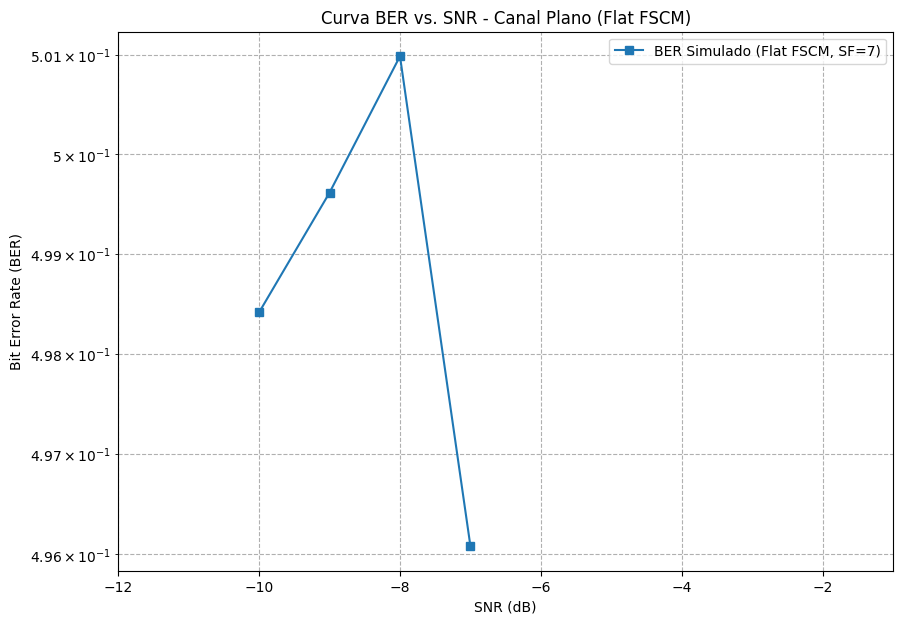

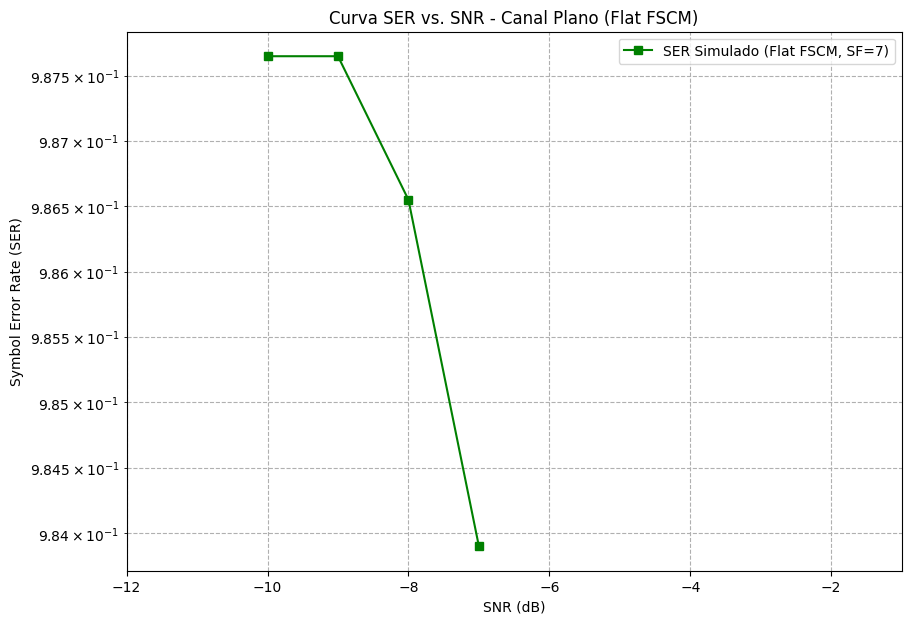

In [232]:
N_bits_por_punto = 20000 * SF

snr_db_range = np.arange(-10, -6, 1)

ber_resultados = []
ser_resultados = []

for snr_db in snr_db_range:
    bits_tx = np.random.randint(0, 2, size=N_bits_por_punto)
    simbolos_tx = coder(bits_tx, SF)
    chirps_tx = waveform_former(simbolos_tx, SF)
    chirps_rx_con_ruido = agregacion_AWNG(chirps_tx, snr_db)

    simbolos_rx = n_tuple_former(chirps_rx_con_ruido, SF)
    bits_rx = decoder(simbolos_rx, SF)
    bits_rx = bits_rx[:len(bits_tx)]

    current_ber = ber(bits_tx, bits_rx)
    current_ser = ser(simbolos_tx, simbolos_rx)

    if current_ber == 0: current_ber = 1e-9
    if current_ser == 0: current_ser = 1e-9

    ber_resultados.append(current_ber)
    ser_resultados.append(current_ser)

print("Simulación completada.")

# --- Visualización de Resultados ---
# Gráfico de BER
plt.figure(figsize=(10, 7))
# CAMBIO 3: Marcadores de cuadrado 's-' para coincidir con la Figura 1
plt.semilogy(snr_db_range, ber_resultados, 's-', label=f'BER Simulado (Flat FSCM, SF={SF})')
plt.title('Curva BER vs. SNR - Canal Plano (Flat FSCM)')
plt.xlabel('SNR (dB)'); plt.ylabel('Bit Error Rate (BER)')
plt.xlim(-12, -1)
plt.grid(True, which="both", ls="--"); plt.legend(); plt.show()

# Gráfico de SER
plt.figure(figsize=(10, 7))
plt.semilogy(snr_db_range, ser_resultados, 's-', color='green', label=f'SER Simulado (Flat FSCM, SF={SF})')
plt.title('Curva SER vs. SNR - Canal Plano (Flat FSCM)')
plt.xlabel('SNR (dB)'); plt.ylabel('Symbol Error Rate (SER)')
plt.xlim(-12, -1)
plt.grid(True, which="both", ls="--"); plt.legend(); plt.show()

Iniciando simulación para Freq.sel. FSCM con SF=7...
Simulando para SNR = -8.0 dB...
Simulando para SNR = -7.0 dB...
Simulando para SNR = -6.0 dB...
Simulando para SNR = -5.0 dB...
Simulando para SNR = -4.0 dB...
Simulando para SNR = -3.0 dB...
Simulación completada.


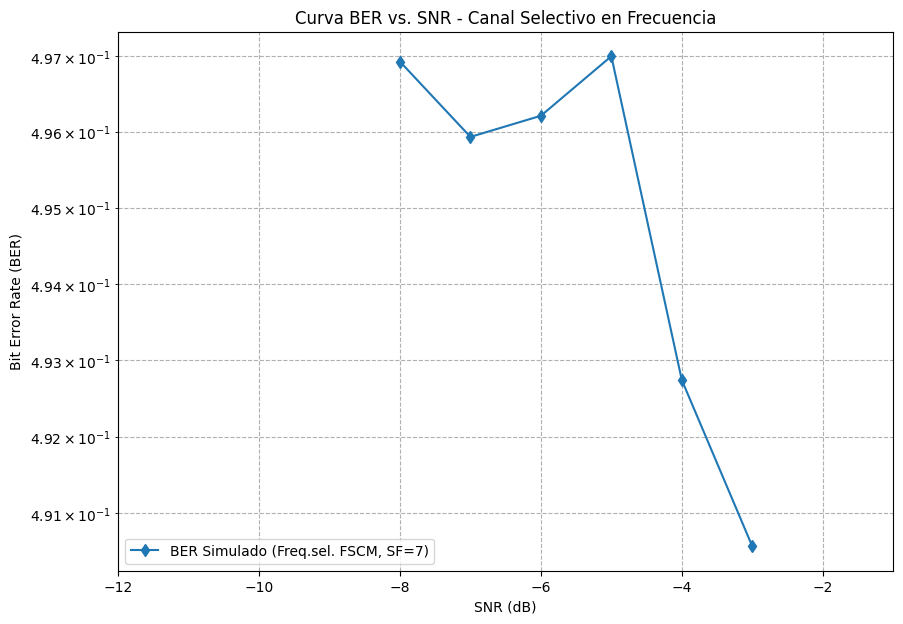

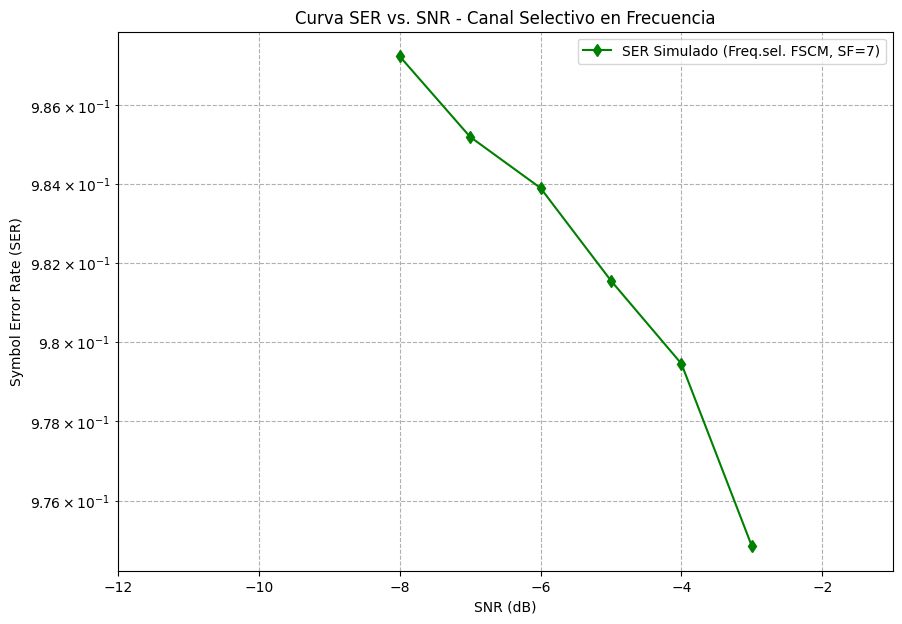

In [218]:
# --- SCRIPT PRINCIPAL DE SIMULACIÓN Y GRAFICACIÓN ---

# --- Parámetros de la simulación para Freq. Sel. FSCM ---
SF = 7  # Cardinalidad 2^7, según Sección IV del paper
# Se recomienda un número alto para obtener una curva suave
N_bits_por_punto = 20000 * SF

# Rango de SNR ajustado para la curva Freq.sel. FSCM de la Figura 1
snr_db_range = np.arange(-8, -2, 1)

ber_resultados = []
ser_resultados = []

print(f"Iniciando simulación para Freq.sel. FSCM con SF={SF}...")
for snr_db in snr_db_range:
    print(f"Simulando para SNR = {snr_db:.1f} dB...")

    bits_tx = np.random.randint(0, 2, size=N_bits_por_punto)
    simbolos_tx = coder(bits_tx, SF)
    chirps_tx = waveform_former(simbolos_tx, SF)

    # --- CADENA DE TRANSMISIÓN MODIFICADA ---
    # 1. La señal pasa por el canal selectivo en frecuencia
    chirps_con_canal = canal_selectivo_frecuencia(chirps_tx, SF)
    # 2. Se añade el ruido AWGN a la señal ya afectada por el canal
    chirps_rx_con_ruido = agregacion_AWNG(chirps_con_canal, snr_db)
    # --- FIN DE LA MODIFICACIÓN ---

    simbolos_rx = n_tuple_former(chirps_rx_con_ruido, SF)
    bits_rx = decoder(simbolos_rx, SF)
    bits_rx = bits_rx[:len(bits_tx)]

    current_ber = ber(bits_tx, bits_rx)
    current_ser = ser(simbolos_tx, simbolos_rx)

    if current_ber == 0: current_ber = 1e-9
    if current_ser == 0: current_ser = 1e-9

    ber_resultados.append(current_ber)
    ser_resultados.append(current_ser)

print("Simulación completada.")

# --- Visualización de Resultados ---
# Gráfico de BER
plt.figure(figsize=(10, 7))
plt.semilogy(snr_db_range, ber_resultados, 'd-', label=f'BER Simulado (Freq.sel. FSCM, SF={SF})') # Marcadores de diamante 'd'
plt.title('Curva BER vs. SNR - Canal Selectivo en Frecuencia')
plt.xlabel('SNR (dB)'); plt.ylabel('Bit Error Rate (BER)')
#plt.ylim(1e-5, 1e-1)
plt.xlim(-12, -1)
plt.grid(True, which="both", ls="--"); plt.legend(); plt.show()

# Gráfico de SER
plt.figure(figsize=(10, 7))
plt.semilogy(snr_db_range, ser_resultados, 'd-', color='green', label=f'SER Simulado (Freq.sel. FSCM, SF={SF})')
plt.title('Curva SER vs. SNR - Canal Selectivo en Frecuencia')
plt.xlabel('SNR (dB)'); plt.ylabel('Symbol Error Rate (SER)')
plt.xlim(-12, -1)
plt.grid(True, which="both", ls="--"); plt.legend(); plt.show()
